In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#check correlation
data.corr(numeric_only=True) # Add numeric_only=True to consider only numerical features

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


Data Analysis

<ipython-input-7-12fc2bb6d45b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])


Text(0, 0.5, 'Count')

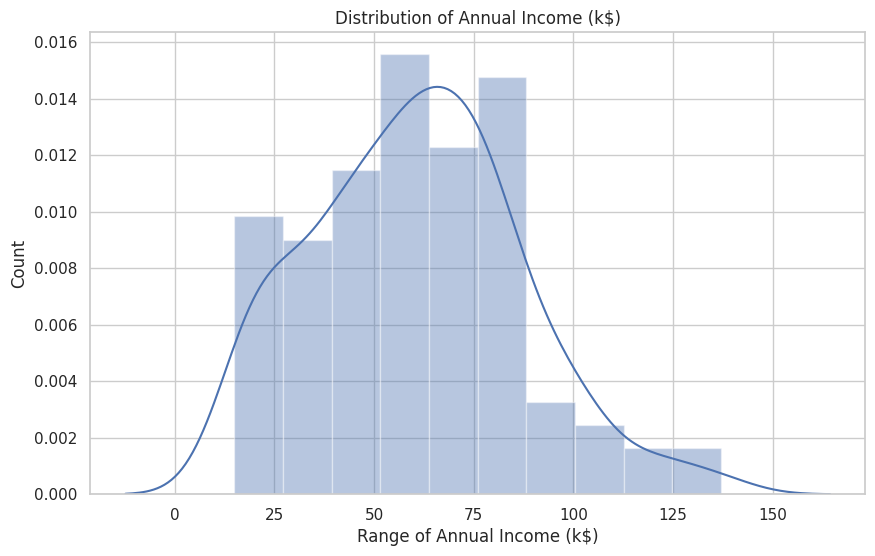

In [7]:
#Distribution of Annual Income
plt.figure(figsize = (10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title("Distribution of Annual Income (k$)")
plt.xlabel("Range of Annual Income (k$)")
plt.ylabel('Count')


<ipython-input-8-72b73a8be58a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


Text(0, 0.5, 'Count')

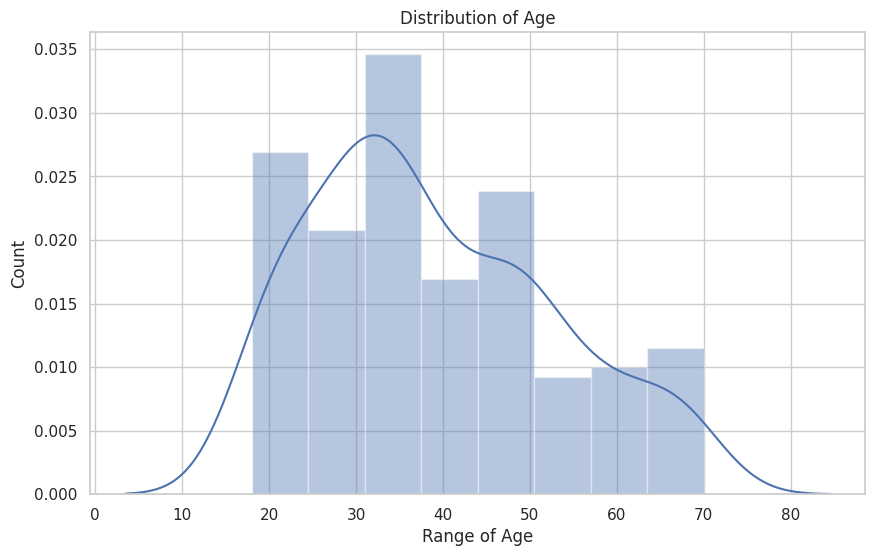

In [8]:
#distribution of age
plt.figure(figsize = (10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title("Distribution of Age")
plt.xlabel("Range of Age")
plt.ylabel('Count')

<ipython-input-9-7a2463f1645f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spending Score (1-100)'])


Text(0, 0.5, 'Count')

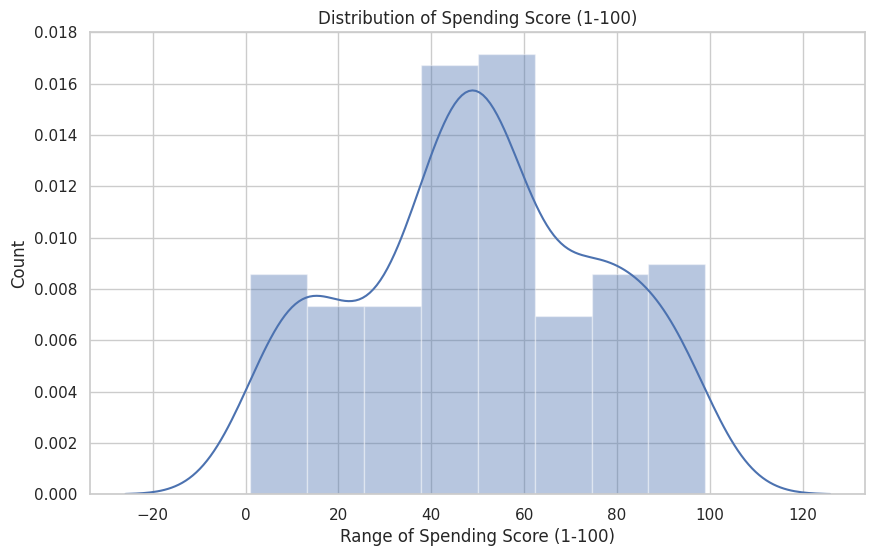

In [9]:
#distribution of spending score
plt.figure(figsize = (10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title("Distribution of Spending Score (1-100)")
plt.xlabel("Range of Spending Score (1-100)")
plt.ylabel('Count')

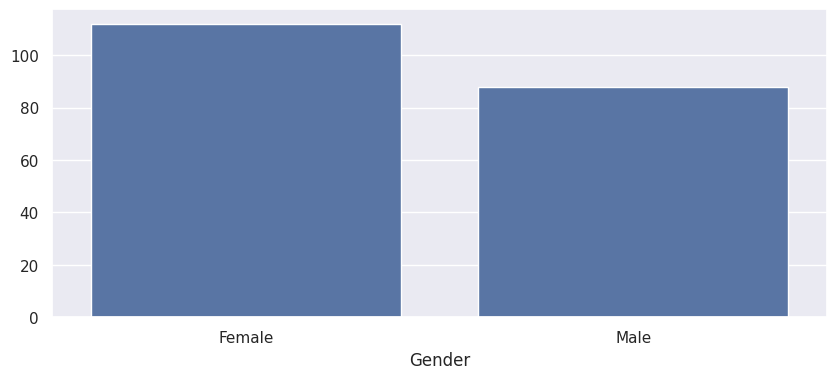

In [10]:
#distribution of gender
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
sns.barplot(x = genders.index, y = genders.values)
plt.show()

In [11]:
data.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
#data splitting
df = data[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [14]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


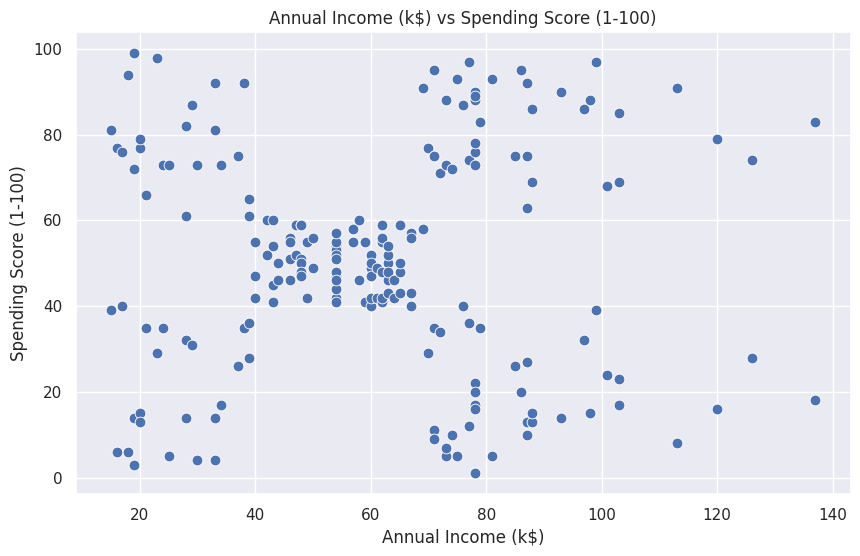

In [16]:
#to find clusters
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data= X, s = 60)
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

K-Means Clustering

In [17]:
from sklearn.cluster import KMeans

In [18]:
#to find the optimal number of clusters for K-Means clustering using the Elbow Method.
#Within-Cluster Sum of Squares (WCSS) for each number of clusters.
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

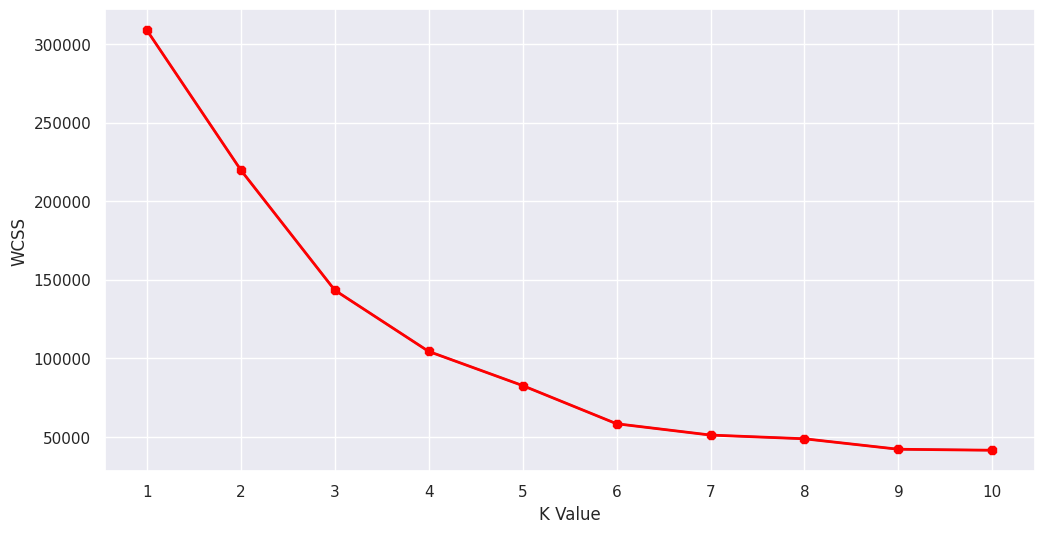

In [30]:
#The "elbow" point visually indicates the best number of clusters to use. 🚀
plt.figure(figsize = (12, 6))
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth = 2, color="red", marker = "8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel('WCSS')
plt.show()

In [20]:
km1  = KMeans(n_clusters=5)
km1.fit(X)
y=km1.predict(X)
df["label"] = y
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


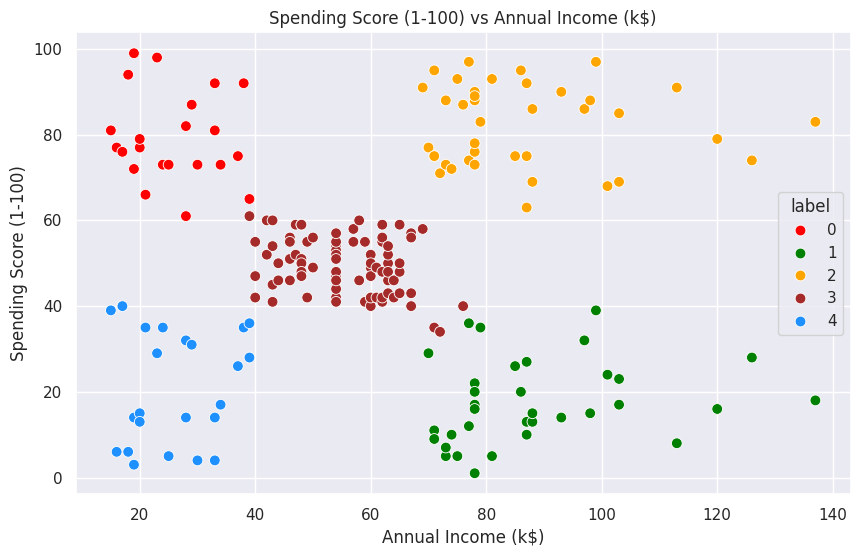

In [21]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = "label",
               palette=['red', 'green', 'orange', 'brown', 'dodgerblue'], legend = 'full', data = df, s = 60)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Spending Score (1-100) vs Annual Income (k$)")
plt.show()

In [22]:
cust1=df[df["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df[df["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df[df["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df[df["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df[df["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 35
They are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
Number of customer in 2nd group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 3rd group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customer in 4th group= 81
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 1

Clustering on the basis of 3D Data



In [23]:
df2 = data[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
X2 = df2[['Age', 'Annual Income (k$)','Spending Score (1-100)']]


In [25]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init="k-means++")
    km.fit(X2)
    wcss.append(km.inertia_)

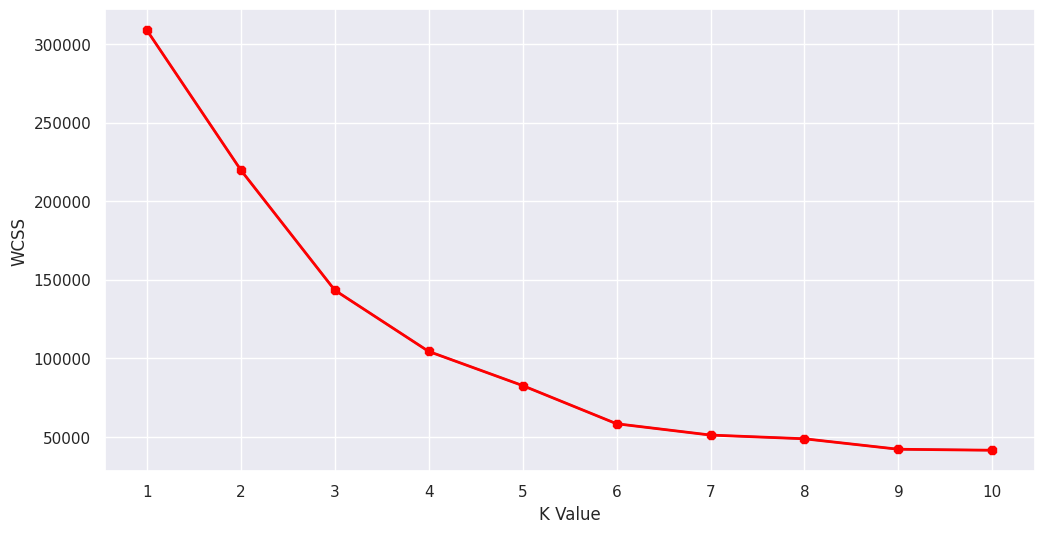

In [26]:
plt.figure(figsize = (12, 6))
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth = 2, color="red", marker = "8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel('WCSS')
plt.show()

In [27]:
km2  = KMeans(n_clusters=5)
km2.fit(X2)
y2=km2.predict(X2)
df2["label"] = y2
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


In [28]:
from mpl_toolkits.mplot3d import Axes3D


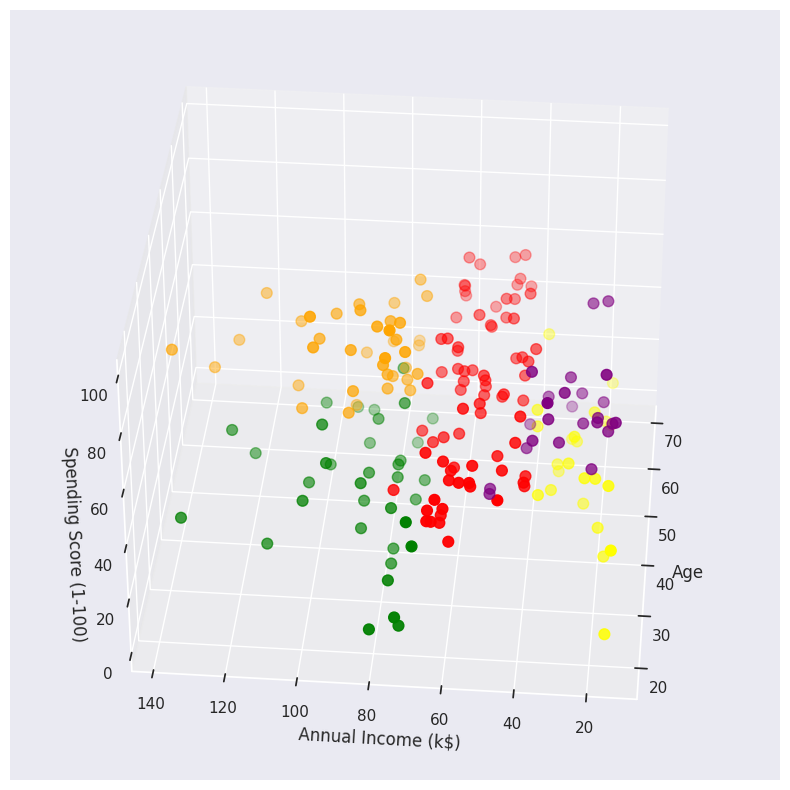

In [31]:
#each colored cluster represents customers grouped by their age, annual income, and spending score.
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df2.Age[df2.label == 0], df2['Annual Income (k$)'][df2.label==0], df2['Spending Score (1-100)'][df2.label==0], c = 'purple', s = 60)
ax.scatter(df2.Age[df2.label == 1], df2['Annual Income (k$)'][df2.label==1], df2['Spending Score (1-100)'][df2.label==1], c = 'red', s = 60)
ax.scatter(df2.Age[df2.label == 2], df2['Annual Income (k$)'][df2.label==2], df2['Spending Score (1-100)'][df2.label==2], c = 'orange', s = 60)
ax.scatter(df2.Age[df2.label == 3], df2['Annual Income (k$)'][df2.label==3], df2['Spending Score (1-100)'][df2.label==3], c = 'green', s = 60)
ax.scatter(df2.Age[df2.label == 4], df2['Annual Income (k$)'][df2.label==4], df2['Spending Score (1-100)'][df2.label==4], c = 'yellow', s = 60)

ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

The visual helps identify patterns, such as which age group spends the most or how income affects spending behavior.